<a href="https://colab.research.google.com/github/hussainmustafa2190/Titanic_classifier/blob/main/Titanic_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

df_train  = pd.read_csv('/content/drive/MyDrive/DS/train.csv')
df_test  = pd.read_csv('/content/drive/MyDrive/DS/test.csv')


df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print(df_train['Survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


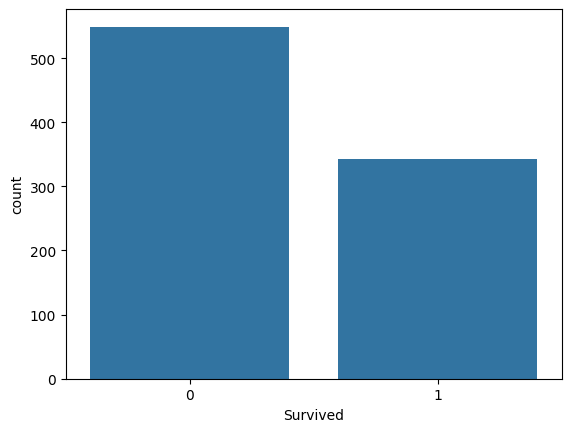

In [ ]:
sns.countplot(data=df_train, x = 'Survived')
plt.show()

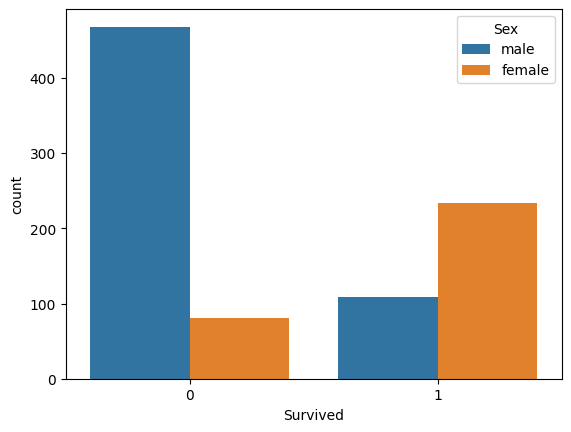

In [ ]:
sns.countplot(data = df_train, x= 'Survived', hue='Sex')
plt.show()

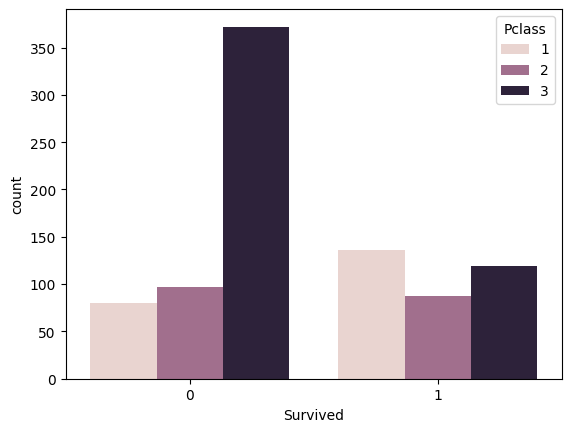

In [ ]:
sns.countplot(data = df_train, x= 'Survived', hue='Pclass')
plt.show()

Text(0.5, 1.0, 'Survival by Age')

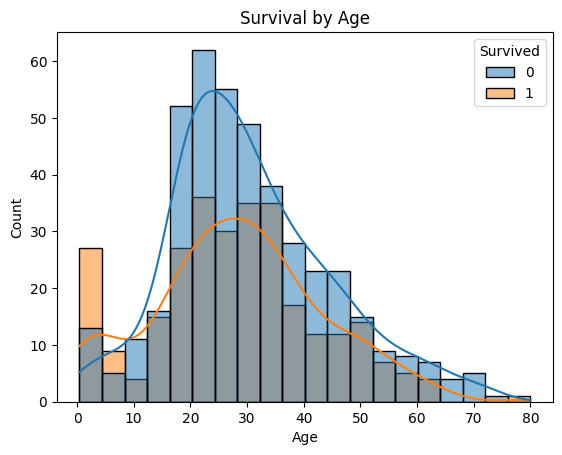

In [ ]:
sns.histplot(data=df_train, x='Age', hue='Survived', kde=True)
plt.title('Survival by Age')

In [ ]:
median_age = df_train['Age'].median()
df_train['Age'].fillna(median_age, inplace=True)
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})

/tmp/ipython-input-2487924127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(median_age, inplace=True)


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.drop('Cabin', axis=1, inplace=True)

In [ ]:
common = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(common, inplace=True)

/tmp/ipython-input-854896777.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(common, inplace=True)


In [ ]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.')
df_train['Title'].value_counts()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1241670578.py:1: SyntaxWarning: invalid escape sequence '\.'
  df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.')


,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [ ]:
rare_titles = ['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer','Mlle','Mme','Ms','Countess']
df_train['Title'] = df_train['Title'].replace(rare_titles, 'Others')

df_train['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Others,27


In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
df_train['Title'] = df_train['Title'].map(title_mapping)
df_train['Title'] = df_train['Title'].fillna(0)
print(df_train[['Name', 'Title']].head())

                                                Name  Title
0                            Braund, Mr. Owen Harris      1
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      3
2                             Heikkinen, Miss. Laina      2
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      3
4                           Allen, Mr. William Henry      1


In [ ]:
df_train = pd.get_dummies(df_train, columns=['Embarked'])
y = df_train['Survived']
X = df_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Title       891 non-null    int64  
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)


from sklearn.preprocessing import StandardScaler
columns_to_scale = ['Age', 'Fare']
scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 78.21%


In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_C,Embarked_Q,Embarked_S
331,1,0,1.253641,0,0,-0.078684,1,False,False,True
733,2,0,-0.477284,0,0,-0.377145,1,False,False,True
382,3,0,0.215086,0,0,-0.474867,1,False,False,True
704,3,0,-0.246494,1,0,-0.476230,1,False,False,True
813,3,1,-1.785093,4,2,-0.025249,2,False,False,True


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

log_reg_predictions = model.predict(X_test)

precision = precision_score(y_test, log_reg_predictions)
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, log_reg_predictions)
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test, log_reg_predictions)
print(f"F1-Score: {f1 * 100:.2f}%")

Precision: 73.97%
Recall: 72.97%
F1-Score: 73.47%


Confusion Matrix:
[[86 19]
 [20 54]]


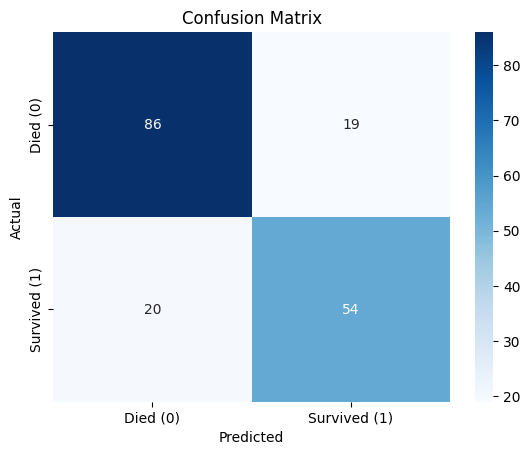

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died (0)', 'Survived (1)'],
            yticklabels=['Died (0)', 'Survived (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df_test  = pd.read_csv('/content/drive/MyDrive/DS/test.csv')

In [ ]:
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.')
df_test['Title'].value_counts()

other = ['Col', 'Rev','Ms', 'Dr', 'Dona']
df_test['Title'] = df_test['Title'].replace(other, 'Others')
df_test['Title'].value_counts()

df_test['Title'] = df_test['Title'].map(title_mapping)
df_test['Title'] = df_test['Title'].fillna(0)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-670994940.py:1: SyntaxWarning: invalid escape sequence '\.'
  df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.')


In [ ]:
median_age = df_test['Age'].median()
df_test['Age'].fillna(median_age, inplace=True)

df_test.drop('Cabin', axis=1, inplace=True)

/tmp/ipython-input-1704858593.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(median_age, inplace=True)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [ ]:
df_test['Sex'] = df_test['Sex'].map({'male':0 , 'female':1})

In [ ]:
median_fare  = df_test['Fare'].median()
df_test['Fare'].fillna(median_fare, inplace=True)

/tmp/ipython-input-4286538062.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Fare'].fillna(median_fare, inplace=True)


In [ ]:
df_test = pd.get_dummies(df_test, columns=['Embarked'])

In [ ]:
test = df_test.drop(['PassengerId','Name','Ticket'],axis=1)

In [ ]:
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

In [ ]:
df_res = pd.read_csv('/content/drive/MyDrive/DS/gender_submission.csv')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=1000, criterion='gini',min_samples_leaf=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=1000, min_samples_leaf=100, n_estimators=10,
                       random_state=42)

In [205]:
pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, pred)
print(f"Model Accuracy: {acc * 100:.2f}%")

Model Accuracy: 78.21%


Confusion Matrix:
[[88 17]
 [22 52]]


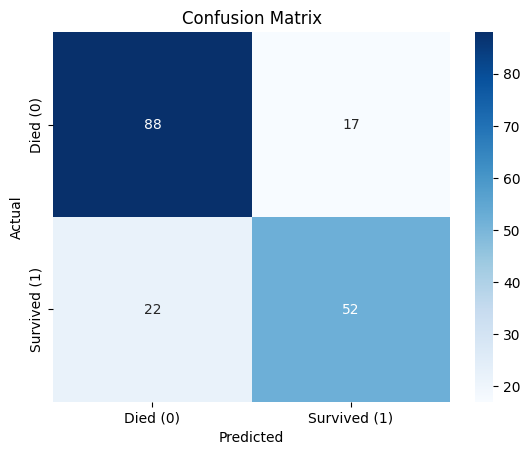

In [206]:
cm = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died (0)', 'Survived (1)'],
            yticklabels=['Died (0)', 'Survived (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()